In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv("E:/Praxis-BA-18/Term-1/ML/Loan predictive/train_data.csv")

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [129]:
train_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [6]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

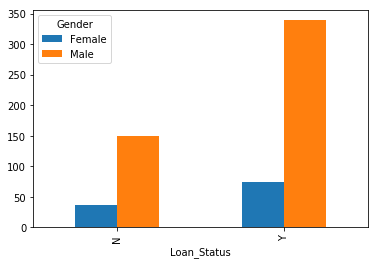

In [7]:
##Loan status Vs Gender
ge = train_data.groupby(['Loan_Status', 'Gender']).size()
ge=ge.unstack(level=1)
ge.plot(kind = 'bar')

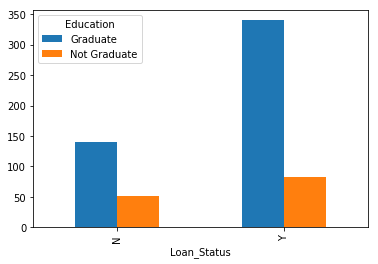

In [8]:
##Loan status Vs Education
ed = train_data.groupby(['Loan_Status', 'Education']).size()
ed=ed.unstack(level=1)
ed.plot(kind = 'bar')

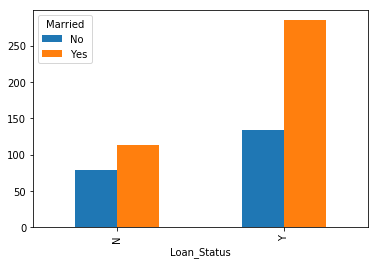

In [9]:
##Loan status Vs Married
mr = train_data.groupby(['Loan_Status', 'Married']).size()
mr=mr.unstack(level=1)
mr.plot(kind = 'bar')

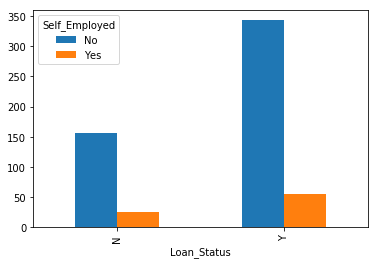

In [10]:
##Loan status Vs Self_Employed
se = train_data.groupby(['Loan_Status', 'Self_Employed']).size()
se=se.unstack(level=1)
se.plot(kind = 'bar')

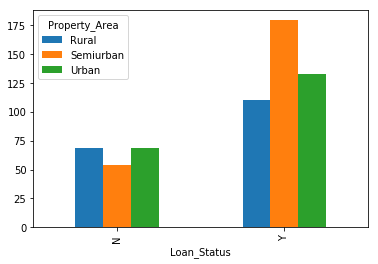

In [11]:
##Loan status Vs Property_Area
pa = train_data.groupby(['Loan_Status', 'Property_Area']).size()
pa=pa.unstack(level=1)
pa.plot(kind = 'bar')

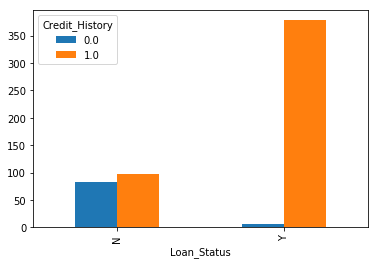

In [12]:
ch = train_data.groupby(['Loan_Status', 'Credit_History']).size()
ch=ch.unstack(level=1)
ch.plot(kind = 'bar')

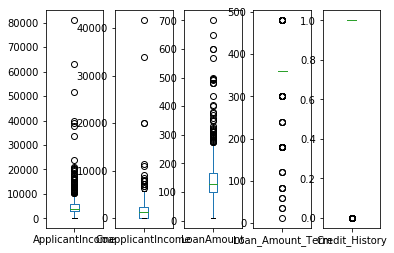

In [13]:
train_data.plot(kind='box',subplots=True,sharex=False,sharey=False)
plt.show()

In [14]:
train_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [15]:
##new_data=pd.get_dummies(data=train_data,columns=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status'])
new_data=train_data

In [16]:
new_data=new_data.drop('Loan_ID',axis=1)

In [17]:
data_cor=new_data.corr().abs()

In [18]:
data_cor.shape

(5, 5)

In [19]:
upper_cor = data_cor.where(np.triu(np.ones(data_cor.shape), k=1).astype(np.bool)).stack().reset_index()
##upper_cor
delete=upper_cor[upper_cor[0]>0.8]
delete
                 

,level_0,level_1,0


In [20]:
new_data.shape

(614, 12)

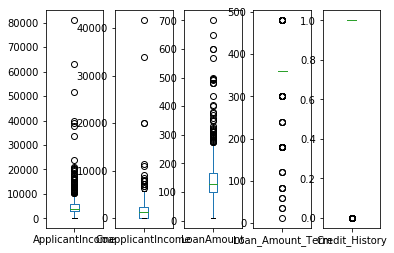

In [21]:
new_data.plot(kind='box',subplots=True,sharex=False,sharey=False)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000149AF9DCCF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000149AFB15198>]], dtype=object)

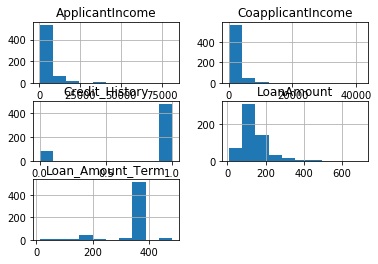

In [22]:
new_data.hist()

In [23]:
new_data.shape

(614, 12)

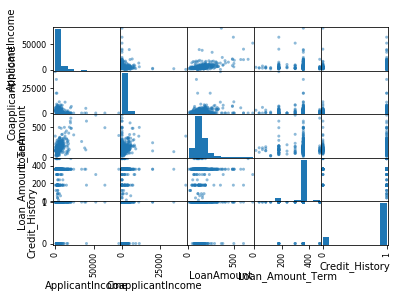

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_data)
plt.show()

In [25]:
new_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
import stat 
print(new_data.groupby('Dependents',axis=0).size())
new_data['Dependents']=new_data['Dependents'].fillna(0)
##new_data['Dependents']


Dependents
0     345
1     102
2     101
3+     51
dtype: int64


In [27]:
##new_data=pd.get_dummies(data=new_data,columns=['Dependents'])
##new_data.shape
##new_data.head()

In [28]:
new_data.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

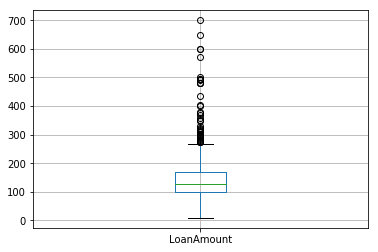

In [29]:
%matplotlib inline
new_data.boxplot(column=['LoanAmount'])

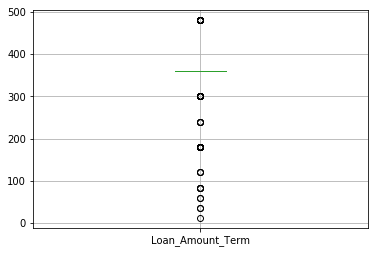

In [30]:
new_data.boxplot(column=['Loan_Amount_Term'])

In [31]:
new_data1=new_data['LoanAmount']
Q1 = new_data1.quantile(0.25) 
Q3 = new_data1.quantile(0.75) 
IQR = Q3 - Q1 
print(((new_data1 < (Q1 - 1.5 * IQR)) | (new_data1 > (Q3 + 1.5 * IQR))).sum())
IQR

39


68.0

In [32]:
new_data2=new_data['Loan_Amount_Term']
Q1 = new_data2.quantile(0.25) 
Q3 = new_data2.quantile(0.75) 
IQR = Q3 - Q1
print(((new_data2 < (Q1 - 1.5 * IQR)) | (new_data2 > (Q3 + 1.5 * IQR))).sum())
IQR

88


0.0

In [33]:
la_mean=np.mean(new_data['LoanAmount'])
new_data['LoanAmount']=new_data['LoanAmount'].fillna(la_mean)
##new_data['LoanAmount']=new_data['LoanAmount'].fillna(new_data['LoanAmount'].mean(), inplace = True)


In [34]:
from statistics import mode
lt_mode=new_data['Loan_Amount_Term'].mode()
print(lt_mode)
new_data['Loan_Amount_Term']=new_data['Loan_Amount_Term'].fillna(new_data['Loan_Amount_Term'].mode()[0])

##new_data['Loan_Amount_Term']=new_data['Loan_Amount_Term'].fillna(float(new_data['Loan_Amount_Term'].mode()), inplace = True)

0    360.0
dtype: float64


In [35]:
new_data['Self_Employed']=new_data['Self_Employed'].fillna(new_data['Self_Employed'].mode()[0])

In [36]:
new_data.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
new_data['Credit_History']=new_data['Credit_History'].fillna(new_data['Credit_History'].mode()[0])

In [38]:
new_data['Gender']=new_data['Gender'].fillna(new_data['Gender'].mode()[0])

In [39]:
new_data['Married']=new_data['Married'].fillna(new_data['Married'].mode()[0])

In [40]:
new_data.shape

(614, 12)

In [41]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [42]:
data_dum=pd.get_dummies(data=new_data,columns=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status'])


In [43]:
new_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
data_dum.shape

(614, 24)

In [45]:
data_dum.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_0,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
1,4583,1508.0,128.000000,360.0,0,1,0,1,0,0,...,0,1,0,0,1,1,0,0,1,0
2,3000,0.0,66.000000,360.0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,0,1,0,1,0,1,...,1,1,0,0,1,0,0,1,0,1
4,6000,0.0,141.000000,360.0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


In [46]:
data_dum=data_dum.drop(['Gender_Female','Married_No','Dependents_0','Self_Employed_No','Education_Not Graduate','Credit_History_0.0','Property_Area_Semiurban','Loan_Status_N'],axis=1)

In [47]:
data_dum.shape

(614, 15)

In [48]:
from sklearn import preprocessing

In [49]:
##Standardised the data
from sklearn import preprocessing

In [50]:
import 

SyntaxError: invalid syntax (<ipython-input-50-7f0e4804a921>, line 1)

In [51]:
from scipy import stats
##data_dum=stats.zscore(data_dum['ApplicantIncome'])

In [52]:
min_max_scal=preprocessing.MinMaxScaler()

In [53]:
data_dum['ApplicantIncome']
x = data_dum[['ApplicantIncome']].values.astype(float)
x_scal=min_max_scal.fit_transform(x)
x_nor=pd.DataFrame(x_scal)
x_nor
data_dum['ApplicantIncome']=x_nor
##new_data['ApplicantIncome']

In [54]:
data_dum['LoanAmount']
x = data_dum[['LoanAmount']].values.astype(float)
x_scal1=min_max_scal.fit_transform(x)
x_nor1=pd.DataFrame(x_scal1)
x_nor1
data_dum['LoanAmount']=x_nor1

In [55]:
data_dum['Loan_Amount_Term']
x = data_dum[['Loan_Amount_Term']].values.astype(float)
x_scal2=min_max_scal.fit_transform(x)
x_nor2=pd.DataFrame(x_scal1)
x_nor2
data_dum['Loan_Amount_Term']=x_nor2

In [56]:
data_dum['CoapplicantIncome']
x = data_dum[['CoapplicantIncome']].values.astype(float)
x_scal2=min_max_scal.fit_transform(x)
x_nor2=pd.DataFrame(x_scal2)
x_nor2
data_dum['CoapplicantIncome']=x_nor2

In [57]:
data_dum.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Rural,Property_Area_Urban,Loan_Status_Y
0,0.070489,0.000000,0.198860,0.198860,1,0,0,0,0,1,0,1,0,1,1
1,0.054830,0.036192,0.172214,0.172214,1,1,1,0,0,1,0,1,1,0,0
2,0.035250,0.000000,0.082489,0.082489,1,1,0,0,0,1,1,1,0,1,1
3,0.030093,0.056592,0.160637,0.160637,1,1,0,0,0,0,0,1,0,1,1
4,0.072356,0.000000,0.191027,0.191027,1,0,0,0,0,1,0,1,0,1,1


In [58]:
##new_data=new_data.drop(['Dependents'],axis=0)


In [59]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [60]:
from sklearn.model_selection import train_test_split
y=data_dum['Loan_Status_Y']
x=data_dum
x=x.drop('Loan_Status_Y',axis=1)
x.shape

(614, 14)

In [61]:
##Logistic regression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X=x_train, y=y_train)
y_pred_lr=lr_model.predict(X=x_test)
print(y_pred_lr)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_lr))


[0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 0 1 0 1 1]
0.772357723577


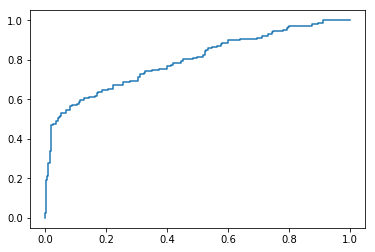

In [62]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
pred_prob =lr_model.predict_proba(X=x_train)
tpr1, fpr1, th = roc_curve(y_train, pred_prob[:,0]) 
plt.plot(fpr1, tpr1)

In [63]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score
print(confusion_matrix(y_test,y_pred_lr))
print(cohen_kappa_score(y_test,y_pred_lr))
print(accuracy_score(y_test,y_pred_lr))

[[17 28]
 [ 0 78]]
0.435039370079
0.772357723577


In [64]:
from sklearn.model_selection import cross_val_score
scores_lr = cross_val_score(lr_model,x_train,y_train, cv=5)
print(scores_lr)
print(scores_lr.mean())

[ 0.7979798   0.81818182  0.86734694  0.76530612  0.84536082]
0.818835100426


In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(X=x_test)
y_pred_rf
print(accuracy_score(y_test,y_pred_rf))

0.772357723577


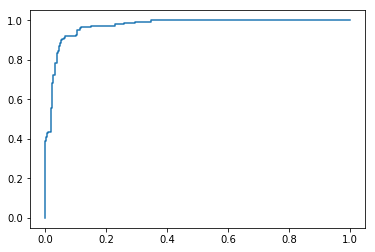

In [67]:
pred_prob =rf.predict_proba(X=x_train)
tpr1, fpr1, th = roc_curve(y_train, pred_prob[:,0]) 
plt.plot(fpr1, tpr1)

In [68]:
print(confusion_matrix(y_test,y_pred_rf))
print(cohen_kappa_score(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))

[[17 28]
 [ 0 78]]
0.435039370079
0.772357723577


In [69]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X=x_train, y=y_train)
y_pred_clf=clf.predict(X=x_test)
y_pred_clf
print(accuracy_score(y_test,y_pred_clf))
scores_svm=cross_val_score(clf,x_train,y_train, cv=5)
print(scores_svm)
print(scores_svm.mean())

0.772357723577
[ 0.7979798   0.81818182  0.86734694  0.76530612  0.84536082]
0.818835100426


In [120]:
from sklearn.naive_bayes import GaussianNB

In [123]:
gnb=GaussianNB()
gnb.fit(X=x_train,y=y_train)
y_pred_nb=gnb.predict(X=x_test)
y_pred_nb

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1], dtype=uint8)

In [126]:
print(accuracy_score(y_test,y_pred_clf))
scores_nb=cross_val_score(gnb,x_train,y_train, cv=5)
print(scores_nb)
print(scores_nb.mean())

0.772357723577
[ 0.78787879  0.80808081  0.86734694  0.74489796  0.83505155]
0.808651208062


In [125]:
print(cohen_kappa_score(y_test,y_pred_nb))
print(accuracy_score(y_test,y_pred_nb))

0.481012658228
0.788617886179


In [141]:
test_data=pd.read_csv("E:/Praxis-BA-18/Term-1/ML/Loan predictive/test_data.csv")
data_new=test_data
test_data.shape

(367, 12)

In [142]:
data_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [89]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [90]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [91]:
test_data=test_data.drop('Loan_ID',axis=1)

In [92]:
##train_data.head()

In [93]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [94]:
test_data['Dependents']=test_data['Dependents'].fillna(0)

In [95]:
test_data['Self_Employed']=test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])

In [96]:
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean())
test_data['LoanAmount'].dtype

dtype('float64')

In [97]:
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0])

In [98]:
test_data['Gender']=test_data['Gender'].fillna(test_data['Gender'].mode()[0])

In [99]:
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0])

In [100]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [101]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [102]:
data_dum_test=pd.get_dummies(data=test_data,columns=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'])

In [103]:
data_dum_test.dtypes

ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Credit_History_0.0           uint8
Credit_History_1.0           uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [104]:
data_dum_test.shape

(367, 22)

In [105]:
data_dum_test=data_dum_test.drop(['Gender_Female','Married_No','Dependents_0','Self_Employed_No','Education_Not Graduate','Credit_History_0.0','Property_Area_Semiurban'],axis=1)

In [106]:
data_dum_test.shape

(367, 14)

In [107]:
data_dum_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Rural,Property_Area_Urban
0,5720,0,110.0,360.0,1,1,0,0,0,1,0,1,0,1
1,3076,1500,126.0,360.0,1,1,1,0,0,1,0,1,0,1
2,5000,1800,208.0,360.0,1,1,0,1,0,1,0,1,0,1
3,2340,2546,100.0,360.0,1,1,0,1,0,1,0,1,0,1
4,3276,0,78.0,360.0,1,0,0,0,0,0,0,1,0,1


In [108]:
from scipy.stats import zscore
##data_dum_test=data_dum_test.apply(zscore)

In [109]:
data_dum_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Rural,Property_Area_Urban
0,5720,0,110.0,360.0,1,1,0,0,0,1,0,1,0,1
1,3076,1500,126.0,360.0,1,1,1,0,0,1,0,1,0,1
2,5000,1800,208.0,360.0,1,1,0,1,0,1,0,1,0,1
3,2340,2546,100.0,360.0,1,1,0,1,0,1,0,1,0,1
4,3276,0,78.0,360.0,1,0,0,0,0,0,0,1,0,1


In [110]:
data_dum_test['ApplicantIncome']
x = data_dum_test[['ApplicantIncome']].values.astype(float)
x_scal=min_max_scal.fit_transform(x)
x_nor=pd.DataFrame(x_scal)
x_nor
data_dum_test['ApplicantIncome']=x_nor

In [114]:
data_dum_test['Loan_Amount_Term']
x = data_dum_test[['Loan_Amount_Term']].values.astype(float)
x_scal2=min_max_scal.fit_transform(x)
x_scal2=min_max_scal.fit_transform(x)
x_nor2=pd.DataFrame(x_scal1)
x_nor2
data_dum_test['Loan_Amount_Term']=x_nor2


data_dum_test['CoapplicantIncome']
x = data_dum_test[['CoapplicantIncome']].values.astype(float)
x_scal2=min_max_scal.fit_transform(x)
x_nor2=pd.DataFrame(x_scal2)
x_nor2
data_dum_test['CoapplicantIncome']=x_nor2
x_nor2=pd.DataFrame(x_scal1)
x_nor2


data_dum_test['CoapplicantIncome']
x = data_dum_test[['CoapplicantIncome']].values.astype(float)
x_scal2=min_max_scal.fit_transform(x)
x_nor2=pd.DataFrame(x_scal2)
x_nor2
data_dum_test['CoapplicantIncome']=x_nor2

In [115]:
data_dum_test['LoanAmount']
x = data_dum_test[['LoanAmount']].values.astype(float)
x_scal1=min_max_scal.fit_transform(x)
x_nor1=pd.DataFrame(x_scal1)
x_nor1
data_dum_test['LoanAmount']=x_nor1

In [117]:
data_dum_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Rural,Property_Area_Urban
0,0.078865,0.000000,0.157088,0.198860,1,1,0,0,0,1,0,1,0,1
1,0.042411,0.062500,0.187739,0.172214,1,1,1,0,0,1,0,1,0,1
2,0.068938,0.075000,0.344828,0.082489,1,1,0,1,0,1,0,1,0,1
3,0.032263,0.106083,0.137931,0.160637,1,1,0,1,0,1,0,1,0,1
4,0.045168,0.000000,0.095785,0.191027,1,0,0,0,0,0,0,1,0,1


In [118]:
data_dum_test.shape

(367, 14)

In [119]:
clf_pred=clf.predict(data_dum_test)

In [127]:
nb_pred=gnb.predict(data_dum_test)

In [128]:
nb_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

In [145]:
data_new['Loan_Status']=pd.Series(nb_pred)

In [146]:
data_new.shape

(367, 13)

In [147]:
data_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [148]:
sub_data=data_new.loc[:,['Loan_ID','Loan_Status']]

In [149]:
sub_data.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [151]:
sub_data.to_csv(r"E:/Praxis-BA-18/Term-1/ML/Loan predictive/loanprediction_submission.csv")